# Source code for ICLR Reproducibility Challenge

In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets
import numpy as np
import torch

DEVICE = 'cuda'

from datasets import RamLoader
from pruning import Pruner
from models import LeNet5
from network import NN

C:\Users\gaha\Workspace\Repositories\SNIP-pruning\datasets.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tmnist_x = TransformStandarize()(torch.tensor(mnist_full_x, device=DEVICE, dtype=torch.float))
C:\Users\gaha\Workspace\Repositories\SNIP-pruning\datasets.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tmnist_y = torch.tensor(mnist_full_y, device=DEVICE, dtype=torch.long)


# Network training

number of weights to prune: [150, 6, 2400, 16, 48000, 120, 10080, 84, 840, 10]
weights left:  [150, 6, 2385, 16, 40034, 107, 5982, 62, 613, 10]
sparsities:  [0.0, 0.0, 0.62, 0.0, 16.6, 10.83, 40.65, 26.19, 27.02, 0.0]
TRAINING:
epoch      | time       | error rate   - mistakes...

Epoch    0 | time 1.500 | lr 0.10000 | tr 100.000% | eval 95.100% - 8559 mis
Epoch    5 | time 1.04e+02 | lr 0.10000 | tr   5.357% | eval  4.300% - 387 mis
Epoch   10 | time 1.04e+02 | lr 0.10000 | tr   5.357% | eval  4.156% - 374 mis
Epoch   15 | time 1.02e+02 | lr 0.10000 | tr   1.786% | eval  4.533% - 408 mis
Epoch   20 | time 1.09e+02 | lr 0.10000 | tr   0.000% | eval  2.744% - 247 mis
Epoch   25 | time 1.09e+02 | lr 0.10000 | tr   3.571% | eval  3.156% - 284 mis
Epoch   30 | time 1.04e+02 | lr 0.10000 | tr   7.143% | eval  2.467% - 222 mis
Epoch   35 | time 1.02e+02 | lr 0.10000 | tr   1.786% | eval  3.278% - 295 mis
Epoch   40 | time 1.06e+02 | lr 0.10000 | tr   3.571% | eval  3.167% - 285 mis
Epoch   4

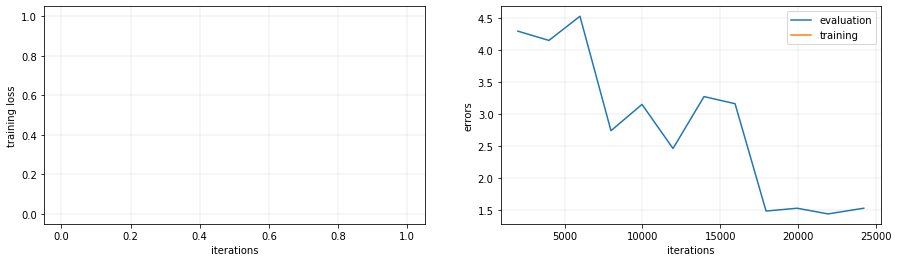

In [2]:
model = LeNet5()
nn = NN(model, DEVICE)

prune = Pruner(model, RamLoader['train'], DEVICE, silent=False)
prune.snip(0.2)

loop_operation=[prune.indicate]

nn.optim = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9, weight_decay=0.0005)
nn.scheduler = torch.optim.lr_scheduler.StepLR(nn.optim, step_size=40, gamma=0.1)

hist = nn.fit(RamLoader, torch.nn.CrossEntropyLoss(), s_report=float('inf'),
              v_report=5, max_epochs=140, silent=False, loop_operation=loop_operation)